In [1]:
#!pip install pandas-datareader

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader as pdr

In [3]:
df=pdr.get_data_yahoo('AAPL')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-08,40.287498,39.632500,40.215000,39.657501,114446000.0,37.637562
2017-09-11,40.512501,39.972500,40.125000,40.375000,126323200.0,38.318508
2017-09-12,40.990002,39.692501,40.652500,40.215000,286856000.0,38.166672
2017-09-13,39.990002,39.477501,39.967499,39.912498,179629600.0,37.879574
2017-09-14,39.849998,39.522499,39.747501,39.570000,95042800.0,37.554516


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-31,160.580002,157.139999,160.309998,157.220001,87991100.0,157.220001
2022-09-01,158.419998,154.669998,156.639999,157.960007,74229900.0,157.960007
2022-09-02,160.360001,154.970001,159.750000,155.809998,76905200.0,155.809998
2022-09-06,157.089996,153.690002,156.470001,154.529999,73714800.0,154.529999
2022-09-07,156.669998,153.610001,154.820007,155.960007,87342200.0,155.960007


In [5]:
df.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [6]:
#separate Open column from given dataset 
df1=df.iloc[:,1:2].values #or df1=df['Open']  df.loc[:,'Open']
#1:2 means start=1 and stop=2-1=1
type(df1)

numpy.ndarray

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
mms=MinMaxScaler()
df1=mms.fit_transform(df1)

In [9]:
df1

array([[0.02877385],
       [0.03114121],
       [0.02919163],
       ...,
       [0.83184797],
       [0.82293557],
       [0.82237853]])

In [10]:
#Find the total number of records 
df1.shape

(1258, 1)

In [11]:
#separate Input and output from Open column 
X_train=df1[0:1257] #start=0 steop=1258-1=1257 
Y_train=df1[1:1258] 

In [12]:
X_train.shape

(1257, 1)

In [13]:
Y_train.shape

(1257, 1)

In [14]:
X_train.ndim

2

In [15]:
X_train=np.reshape(X_train,(1257,1,1))

In [16]:
#To check dimension
X_train.ndim

3

In [17]:
X_train

array([[[0.02877385]],

       [[0.03114121]],

       [[0.02919163]],

       ...,

       [[0.8297591 ]],

       [[0.83184797]],

       [[0.82293557]]])

In [18]:
#Part-2 : -
#Building the RNN with LSTM 
#Recurrent neural network 
#LSTM means long short term memory 
from tensorflow.keras.models import Sequential #initialise neural network
from tensorflow.keras.layers import Dense,Dropout #to add input layer,output layer,
#and hidden layer
from tensorflow.keras.layers import LSTM  #to use built the model 
#LSTM : to manage internal memory , to store previous o/p 
#long short term memory 


In [19]:
#create objecgt of Sequential class
model=Sequential()

In [20]:
#To add layers in model
#This layer are input layer and LSTM layer 
model.add(LSTM(units=50,activation='sigmoid',input_shape=(None,1)))
#None means to take no. of rows and 1 means 1 column

#To add output layer 
model.add(Dropout(0.1))
model.add(Dense(units=1,activation='linear'))

In [21]:
#compile the model 
model.compile(optimizer='adam',loss='mean_squared_error')

In [22]:
X_train1=X_train[:940]
X_test=X_train[940:]

In [23]:
len(X_train1),len(X_test)

(940, 317)

In [24]:
Y_train1=Y_train[:940]
Y_test=Y_train[940:]

In [25]:
len(Y_train1),len(Y_test)

(940, 317)

In [26]:
# Create Early stopping means create a call back
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [27]:
#Train the model
trained_model=model.fit(X_train1,Y_train1,validation_data=(X_test,Y_test),epochs=500)#callbacks=callback,validation_split=0.3)# means 20% data of training data X_train)
#80% for training and 20% for validation

Epoch 1/500
30/30 [==============================] - 2s 11ms/step - loss: 0.1750 - val_loss: 0.4642
Epoch 2/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0626 - val_loss: 0.2898
Epoch 3/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0573 - val_loss: 0.3092
Epoch 4/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0554 - val_loss: 0.2927
Epoch 5/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0561 - val_loss: 0.2689
Epoch 6/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0528 - val_loss: 0.2718
Epoch 7/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0521 - val_loss: 0.2424
Epoch 8/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0481 - val_loss: 0.2385
Epoch 9/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0469 - val_loss: 0.2191
Epoch 10/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0439 - val_loss: 0.2071
Epoch 11

30/30 [==============================] - 0s 3ms/step - loss: 0.0058 - val_loss: 0.0042
Epoch 84/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0029
Epoch 85/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0034
Epoch 86/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.0032
Epoch 87/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0050
Epoch 88/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 89/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.0031
Epoch 90/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0033
Epoch 91/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 92/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 93/500


30/30 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0043
Epoch 165/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0055
Epoch 166/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0052
Epoch 167/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0038
Epoch 168/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0052
Epoch 169/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0047
Epoch 170/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0050
Epoch 171/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0059
Epoch 172/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0052
Epoch 173/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0050
Epoc

30/30 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0030
Epoch 246/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0050
Epoch 247/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0048
Epoch 248/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0032
Epoch 249/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0035
Epoch 250/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0047
Epoch 251/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0050
Epoch 252/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0047
Epoch 253/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0038
Epoch 254/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0050
Epoc

30/30 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0046
Epoch 327/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0040
Epoch 328/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0040
Epoch 329/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0034
Epoch 330/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0031
Epoch 331/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0042
Epoch 332/500
30/30 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 333/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0042
Epoch 334/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 335/500
30/30 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0031
Epoc

30/30 [==============================] - 0s 3ms/step - loss: 7.9539e-04 - val_loss: 0.0040
Epoch 405/500
30/30 [==============================] - 0s 3ms/step - loss: 7.1385e-04 - val_loss: 0.0031
Epoch 406/500
30/30 [==============================] - 0s 3ms/step - loss: 7.7471e-04 - val_loss: 0.0030
Epoch 407/500
30/30 [==============================] - 0s 3ms/step - loss: 8.6436e-04 - val_loss: 0.0039
Epoch 408/500
30/30 [==============================] - 0s 3ms/step - loss: 8.3129e-04 - val_loss: 0.0029
Epoch 409/500
30/30 [==============================] - 0s 3ms/step - loss: 8.1002e-04 - val_loss: 0.0032
Epoch 410/500
30/30 [==============================] - 0s 3ms/step - loss: 8.0148e-04 - val_loss: 0.0043
Epoch 411/500
30/30 [==============================] - 0s 3ms/step - loss: 8.4277e-04 - val_loss: 0.0031
Epoch 412/500
30/30 [==============================] - 0s 3ms/step - loss: 8.2960e-04 - val_loss: 0.0032
Epoch 413/500
30/30 [==============================] - 0s 3ms/step - 

30/30 [==============================] - 0s 3ms/step - loss: 5.9919e-04 - val_loss: 0.0017
Epoch 483/500
30/30 [==============================] - 0s 3ms/step - loss: 6.7849e-04 - val_loss: 0.0026
Epoch 484/500
30/30 [==============================] - 0s 3ms/step - loss: 7.2408e-04 - val_loss: 0.0020
Epoch 485/500
30/30 [==============================] - 0s 3ms/step - loss: 6.7684e-04 - val_loss: 0.0031
Epoch 486/500
30/30 [==============================] - 0s 3ms/step - loss: 7.8977e-04 - val_loss: 0.0010
Epoch 487/500
30/30 [==============================] - 0s 3ms/step - loss: 7.7094e-04 - val_loss: 0.0017
Epoch 488/500
30/30 [==============================] - 0s 3ms/step - loss: 7.2160e-04 - val_loss: 0.0019
Epoch 489/500
30/30 [==============================] - 0s 3ms/step - loss: 7.0370e-04 - val_loss: 0.0030
Epoch 490/500
30/30 [==============================] - 0s 3ms/step - loss: 7.1299e-04 - val_loss: 0.0030
Epoch 491/500
30/30 [==============================] - 0s 3ms/step - 

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


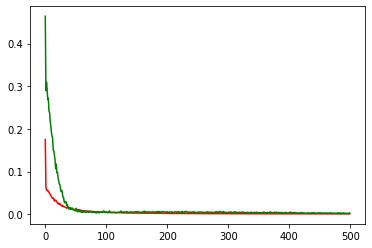

In [29]:
plt.plot(trained_model.history['loss'],color='red',label='training loss')
plt.plot(trained_model.history['val_loss'],color='green',label='validation loss')
plt.show()


In [30]:
Y_pred=model.predict(X_test)

In [31]:
Y_pred

array([[0.6056438 ],
       [0.6119291 ],
       [0.62073696],
       [0.62270844],
       [0.6190178 ],
       [0.6200368 ],
       [0.6261996 ],
       [0.64082944],
       [0.63498414],
       [0.6424589 ],
       [0.6461489 ],
       [0.6397001 ],
       [0.65473634],
       [0.66467595],
       [0.66283053],
       [0.66209143],
       [0.6654134 ],
       [0.6715383 ],
       [0.68078005],
       [0.68011403],
       [0.69209296],
       [0.7058657 ],
       [0.7209839 ],
       [0.7093926 ],
       [0.720926  ],
       [0.72869474],
       [0.7265734 ],
       [0.74946374],
       [0.7461751 ],
       [0.7393809 ],
       [0.71523803],
       [0.72271687],
       [0.7322931 ],
       [0.7389857 ],
       [0.7452246 ],
       [0.749575  ],
       [0.73751646],
       [0.7202895 ],
       [0.73200804],
       [0.7293242 ],
       [0.7358172 ],
       [0.73542017],
       [0.74163425],
       [0.74101526],
       [0.7379688 ],
       [0.73734665],
       [0.7361007 ],
       [0.737

In [32]:
Y_test

array([[0.62198861],
       [0.63159729],
       [0.63375574],
       [0.62971735],
       [0.63083137],
       [0.63758531],
       [0.65373905],
       [0.64726368],
       [0.65554935],
       [0.65965749],
       [0.6524858 ],
       [0.66926611],
       [0.68047625],
       [0.67838738],
       [0.67755188],
       [0.68131186],
       [0.68827468],
       [0.69885809],
       [0.69809217],
       [0.71194822],
       [0.72810201],
       [0.74613569],
       [0.73227964],
       [0.74606599],
       [0.75546584],
       [0.75288963],
       [0.78108896],
       [0.77698092],
       [0.76855597],
       [0.73924246],
       [0.74822455],
       [0.75985245],
       [0.76806852],
       [0.77579726],
       [0.78122825],
       [0.76625823],
       [0.74530008],
       [0.75950429],
       [0.75623175],
       [0.76416936],
       [0.76368191],
       [0.77134106],
       [0.77057514],
       [0.76681527],
       [0.76604935],
       [0.76451752],
       [0.76611894],
       [0.768

In [33]:
#To remove scaling on Y_pred  , use inverse_transform which are define
#in MinMAxScaler class
Y_test1=mms.inverse_transform(Y_test)
Y_test1

array([[124.83000183],
       [126.20999908],
       [126.51999664],
       [125.94000244],
       [126.09999847],
       [127.06999969],
       [129.38999939],
       [128.46000671],
       [129.6499939 ],
       [130.24000549],
       [129.21000671],
       [131.61999512],
       [133.22999573],
       [132.92999268],
       [132.80999756],
       [133.3500061 ],
       [134.3500061 ],
       [135.86999512],
       [135.75999451],
       [137.75      ],
       [140.07000732],
       [142.66000366],
       [140.66999817],
       [142.6499939 ],
       [144.        ],
       [143.63000488],
       [147.67999268],
       [147.08999634],
       [145.88000488],
       [141.66999817],
       [142.96000671],
       [144.63000488],
       [145.80999756],
       [146.91999817],
       [147.69999695],
       [145.55000305],
       [142.53999329],
       [144.58000183],
       [144.11000061],
       [145.25      ],
       [145.17999268],
       [146.27999878],
       [146.16999817],
       [145

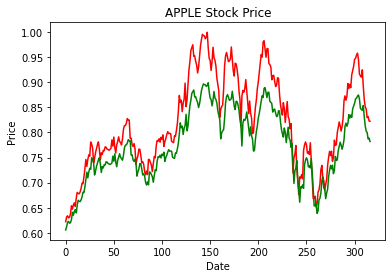

In [36]:
plt.plot(Y_test,color='red',label='Actual Stock Price')
plt.plot(Y_pred,color='green',label='Predicted Stock Price')
plt.title('APPLE Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [40]:
#Predict next day stock price 
n=float(input("Enter Today Opening Stock price : "))
#here n is a scaler variable
#print(type(n))
#First, converts n into 2D numpy array 
n=np.array(n).reshape(-1,1) #here -1 means None means automatic accept no. 
#of rows but next 1 means no. of columns 
#print(type(n))
#print(n.ndim)
#Apply scaling : mormalisation means MinMaxScaler 
n1=mms.transform(n)
#print(n1)
#converts n1 from 2D into 3D array 
v=n1.reshape(-1,1,1)
#print(v)
#prediction 
pred=model.predict(v)
#print(pred)
#to remove scaling from pred
final=mms.inverse_transform(pred)
print("Opening Price of Next day : ",final)

Enter Today Opening Stock price : 65
Opening Price of Next day :  [[65.35681]]
